In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classification of irises
You will practice solving classification problems using the iris dataset used in Week 3.


The iris data set consisted of the following 3 types of irises, 150 in total, collected on the same day in a pasture on the Gaspé Peninsula, Canada.

<li>Iris setosa --Wikipedia
<li>Iris virgicolor --Wikipedia
<li>Iris virginica --Wikipedia

You can solve the problem of guessing the type of iris from 4 types of features (explanatory variables). Since we classify the types of irises, this is called a classification problem.

## List of methods used this time

We will use scikit-learn to train and estimate the following methods. We will not go into the details of each method at this stage. We will simply see that all of them can be easily used with the library, and that there are differences in the results of each method.

<li>Nearest neighbor method
<li>Logistic regression
<li>SVM
<li>Decision tree
<li>Random forest </li>

## Flow of classification problem
First, we will introduce the basic flow of solving classification problems using the nearest neighbor method as an example. In the second half of the assignment, you will be asked to use this as a reference and apply it to other methods as well.

We will learn and practice this flow in more depth later. In this assignment, please have a rough understanding of the flow

### Preparation for practice

Since we want to visualize the results in practice, we will use only two of the four features. In this way, we can draw a two-dimensional scatter plot and check the results. Also, to simplify the problem, we will use only two types of iris. When there are two types of classification targets, we call it **binary classification** and distinguish it from **multi-level classification** . The methods and evaluations vary for each. In this assignment, we will start with the more basic binary classification.

## Problem 1: Select features and categories for practice

There are a total of 18 ways to choose, but we will practice with the following combinations. After retrieving the iris data set as in Week 3, extract these from the data frame.

<li> virgicolor and virginica
<li> sepal_length and petal_length </li>

### Actual problem
Visualization of the results is also effective in solving real problems. However, it is not desirable to limit the number of features used for training and estimation to two for this purpose. Therefore, learning and estimation are done in multiple dimensions, and feature extraction methods such as Principal Component Analysis are applied only for visualization. It is also possible to visualize the data using the scatter plot matrix used in Week 3.

In [3]:
iris_data = load_iris()
X = pd.DataFrame(iris_data.data)
X.columns =['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Y = pd.DataFrame(iris_data.target)
Y.columns = ['Species']
data = pd.concat([X,Y],axis=1)

In [4]:
data.loc[data.Species>0,["sepal_length","petal_length","Species"]]

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


### Scatter plot of data overall

Text(0.5, 0.98, 'Seaborn Pair Plot')

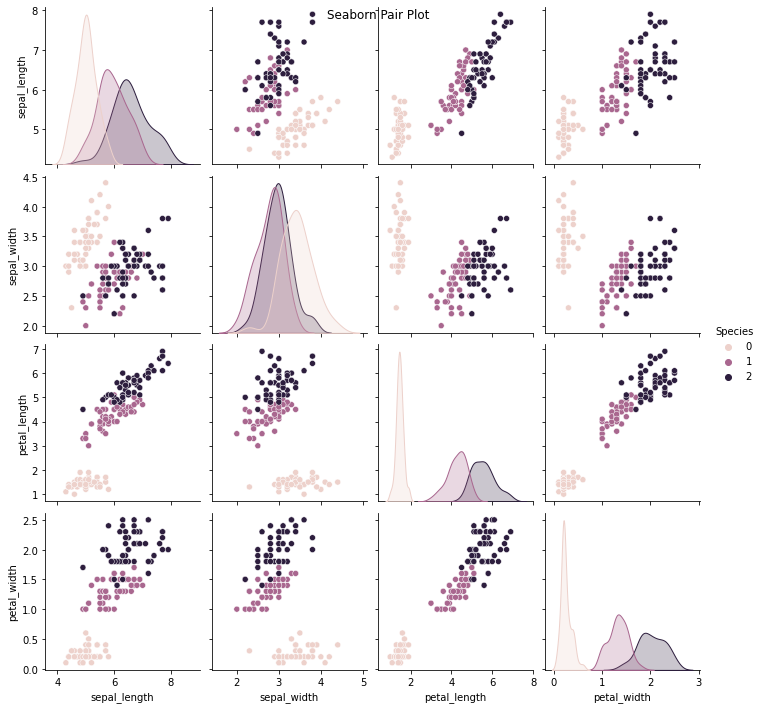

In [5]:
g = sns.pairplot(data, hue='Species')
g.fig.suptitle("Seaborn Pair Plot")

## Problem 2: Data analysis
First, we will analyze the data, which was done in Assignment 1 of Week3. By looking at the scatter plot matrix output at that time, you can also check each of the 18 scatter plots mentioned earlier. You will find that using sepal_length and petal_length to classify virgicolor and virginica can be a bit difficult.

For the sake of review, display a scatter plot of the extracted data, a boxplot, and a violinplot.

### Actual problem

Based on the results of this data analysis, we will perform feature engineering as preprocessing step.


In this case, we extracted sepal_length and petal_length, but after analyzing them, it can be said that some preprocessing was done to make the problem a little more difficult.

### Preprocessing

We will process the data.

### Scatter plot of the extracted data

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

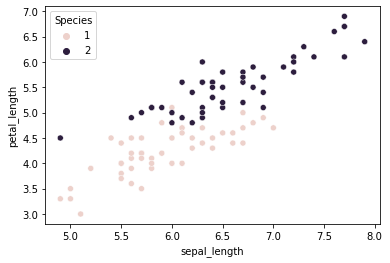

In [6]:
sns.scatterplot(data=data.loc[data.Species>0,["sepal_length","petal_length","Species"]], x="sepal_length", y="petal_length",hue="Species")

### Box plot on petal length

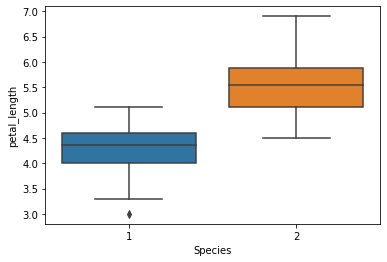

In [7]:
ax = sns.boxplot(x="Species", y="petal_length", data=data.loc[data.Species>0,["sepal_length","petal_length","Species"]])

###  Box plot on sepal length

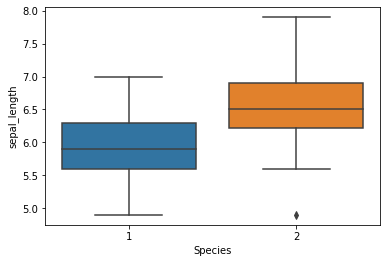

In [8]:
ax = sns.boxplot(x="Species", y="sepal_length", data=data.loc[data.Species>0,["sepal_length","petal_length","Species"]])

### Violin plot on petal length

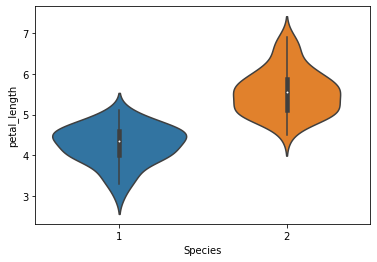

In [9]:
ax = sns.violinplot(x="Species", y="petal_length", data=data.loc[data.Species>0,["sepal_length","petal_length","Species"]])

### Violin plot on sepal length

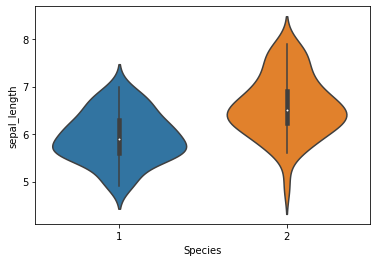

In [10]:
ax = sns.violinplot(x="Species", y="sepal_length", data=data.loc[data.Species>0,["sepal_length","petal_length","Species"]])

## Problem 3: Division of preprocessing/training data and verification data

As part of the pre-processing, we will split the training data and the validation data. This time, divide the data into 75% training data and 25% validation data.


You can use scikit-learn's train_test_split . Please refer to the examples in the official documentation to run it.

**important point**

We used Pandas DataFrame to analyze the data. However, scikit-learn is designed to work with NumPy ndarray. Therefore, let's convert to ndarray at this stage. The feature (explanatory variable) is stored in X and the correct answer (objective variable) is stored in an ndarray called y.

**Reason for splitting up**

The goal of a classification problem is to correctly classify unknown data. In order to check whether this goal is achieved, we leave some of the data for which we actually know the answer, but not for training. The data not used for training is used for estimation, and the index values obtained from the estimation are used for verification. The data used for training is the training data, and the data used for verification is the verification data, and the ratio is generally 7:3 to 8:2.

In [74]:
my_X = data.loc[data.Species>0,["sepal_length","petal_length"]]
my_Y = data.loc[data.Species>0,"Species"]
# np.array(my_X)
# np.array(my_Y)
X_train, X_test, y_train, y_test = train_test_split( np.array(my_X), np.array(my_Y), test_size=0.25, random_state=42)

In [75]:
X_train

array([[6.7, 4.4],
       [5.5, 4.4],
       [6.3, 5. ],
       [5.2, 3.9],
       [7.7, 6.7],
       [5.9, 4.2],
       [6.2, 4.3],
       [7.7, 6.1],
       [6. , 4.5],
       [6.8, 5.9],
       [5.7, 4.5],
       [6.5, 5.5],
       [6.4, 5.3],
       [6. , 4.5],
       [5.6, 4.5],
       [5.7, 4.1],
       [5.4, 4.5],
       [4.9, 3.3],
       [6.7, 5.2],
       [6.7, 5. ],
       [5.6, 3.9],
       [7.9, 6.4],
       [6.6, 4.4],
       [6.8, 5.5],
       [6.1, 4.7],
       [6.4, 4.3],
       [5.5, 4. ],
       [5.8, 4.1],
       [5.6, 4.1],
       [6.6, 4.6],
       [6.4, 5.6],
       [6.3, 4.7],
       [5.8, 5.1],
       [6.7, 4.7],
       [6.9, 5.4],
       [4.9, 4.5],
       [5.9, 5.1],
       [6.5, 5.8],
       [5. , 3.3],
       [6.3, 6. ],
       [7.7, 6.7],
       [5.7, 4.2],
       [7.7, 6.9],
       [6.4, 5.3],
       [6.5, 5.2],
       [7.2, 5.8],
       [6.1, 4.6],
       [6.7, 5.8],
       [5.1, 3. ],
       [6.2, 5.4],
       [7.3, 6.3],
       [7.2, 6. ],
       [5.8,

In [76]:
X_test

array([[6.3, 5.1],
       [6.3, 5.6],
       [6.9, 5.7],
       [5.7, 4.2],
       [5.6, 4.2],
       [5.5, 4. ],
       [6.3, 4.9],
       [7.4, 6.1],
       [5. , 3.5],
       [7. , 4.7],
       [6.2, 4.5],
       [5.5, 3.8],
       [6.3, 4.9],
       [6. , 5.1],
       [6.7, 5.6],
       [6.5, 4.6],
       [6.2, 4.8],
       [6.1, 4.9],
       [6. , 4. ],
       [5.5, 3.7],
       [7.6, 6.6],
       [6. , 4.8],
       [6.8, 4.8],
       [5.8, 4. ],
       [6. , 5. ]])

In [77]:
y_train

array([1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2])

In [78]:
y_test

array([2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2,
       1, 1, 2])

## Problem 4: Pretreatment/Standardization
We perform processing to improve classification accuracy. The appropriate method differs depending on the method, but here we will use standardization as an example.


A library for standardization is also available in scikit-learn. Please use this to standardize.

**important point**

For standardization, fit is performed on the training data, and transform is done on both the training and validation data. Since the validation data is a substitute for unknown data that does not exist in the training phase, it should not be used to calculate the mean and standard deviation for standardization. Also, since this is a classification problem, there is no need to standardize the labels.



**What about the preprocessing in the actual problem?**

It is unlikely to be provided in a clean and easy-to-use situation like the iris dataset. Various processing is required while performing analysis. For example, after confirming the missing values performed in Assignment 2 of Week 3, the missing values may be interpolated in some cases. You can also check outliers and organize multiple datasets.

In [104]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Problem 5: Learning and estimation
We will train with the nearest neighbor method (k-nearest neighbors, k-nn), please refer to the examples in the official scikit-learn document to train k-nn. The input here is the training data.

After training is complete, enter the validation data into the predict method to make an estimate.


There are multiple parameters, but we will not focus on understanding them right now. The most basic element is the number of n_neighbors , so let's try more than one of these. Do the defaults of 5, and 1 and 3 at a minimum. The case of 5 is called 5-nn , the case of 3 is 3-nn , and so on.

In [105]:
from sklearn.neighbors import KNeighborsClassifier
# X_train, X_test, y_train, y_test
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_5 = KNeighborsClassifier(n_neighbors=5)
neigh_1 = KNeighborsClassifier(n_neighbors=1)
neigh_1.fit(X_train, y_train)
neigh_5.fit(X_train, y_train)
neigh_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Problem 6: Evaluation
The trained model is evaluated by calculating the closeness between the estimated value obtained through inputting the features of the validation data and the correct answer value of the validation data.


There are several metrics for evaluating binary classification: **Accuracy (correct answer rate)** , **Precision, Recall** and **F-measure**. To understand the meaning of each of them, we can look at the **Confusion matrix.**

<li>Calculate 4 types of indicators using scikit-learn
<li>Display the confusion matrix using scikit-learn
<li>Briefly research and summarize in writing the meaning of the four types of index values.



In [106]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

### Predict

In [107]:
y_predict_1 = neigh_1.predict(X_test)
y_predict_3 = neigh_3.predict(X_test)
y_predict_5 = neigh_5.predict(X_test)

### Accuracy

In [108]:
print("Accuracy of 1 kkn: {}".format(accuracy_score(y_test,y_predict_1)))
print("Accuracy of 3 kkn: {}".format(accuracy_score(y_test,y_predict_1)))
print("Accuracy of 5 kkn: {}".format(accuracy_score(y_test,y_predict_1)))


Accuracy of 1 kkn: 0.92
Accuracy of 3 kkn: 0.92
Accuracy of 5 kkn: 0.92


### Precision


In [109]:
# b precision_score(y_test, y_predict, average='macro')
print("Precision of 1 kkn: {}".format(precision_score(y_test,y_predict_1,average='macro')))
print("Precision of 3 kkn: {}".format(precision_score(y_test,y_predict_3,average='macro')))
print("Precision of 5 kkn: {}".format(precision_score(y_test,y_predict_5,average='macro')))


Precision of 1 kkn: 0.9230769230769231
Precision of 3 kkn: 0.8782051282051282
Precision of 5 kkn: 0.842948717948718


### Recall  

In [110]:
# a =  recall_score(y_test, y_predict, average='macro')

print("Recall of 1 kkn: {}".format(recall_score(y_test,y_predict_1,average='macro')))
print("Recall of 3 kkn: {}".format(recall_score(y_test,y_predict_3,average='macro')))
print("Recall of 5 kkn: {}".format(recall_score(y_test,y_predict_5,average='macro')))

Recall of 1 kkn: 0.9285714285714286
Recall of 3 kkn: 0.8831168831168831
Recall of 5 kkn: 0.8474025974025974


###  F-measure

In [111]:
pre = precision_score(y_test,y_predict_1,average='macro')
recall  = recall_score(y_test,y_predict_1,average='macro')
F1 = 2 * (pre * recall) / (pre + recall)
print("F1 of 1 kkn: {}".format(F1))
pre = precision_score(y_test,y_predict_3,average='macro')
recall  = recall_score(y_test,y_predict_3,average='macro')
F1 = 2 * (pre * recall) / (pre + recall)
print("F1 of 3 kkn: {}".format(F1))
pre = precision_score(y_test,y_predict_5,average='macro')
recall  = recall_score(y_test,y_predict_5,average='macro')
F1 = 2 * (pre * recall) / (pre + recall)
print("F1 of 5 kkn: {}".format(F1))

F1 of 1 kkn: 0.9258160237388724
F1 of 3 kkn: 0.8806541570165902
F1 of 5 kkn: 0.8451697899480409


### Confusion matrix.

In [112]:
#1 KNN
confusion_matrix(y_test, y_predict_1)

array([[12,  2],
       [ 0, 11]], dtype=int64)

In [113]:
#3 KNN
confusion_matrix(y_test, y_predict_3)

array([[12,  2],
       [ 1, 10]], dtype=int64)

In [114]:
#5 KNN
confusion_matrix(y_test, y_predict_5)

array([[11,  3],
       [ 1, 10]], dtype=int64)

## Problem 7: Visualization
As part of the evaluation process, visualization is performed. In this case, we used 2-dimensional features for classification, so we can visualize them in a scatter plot. We have prepared a function that draws a decision region that determines how to divide the data. For X and y, give the training data or the validation data.



In [118]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


### Train Result

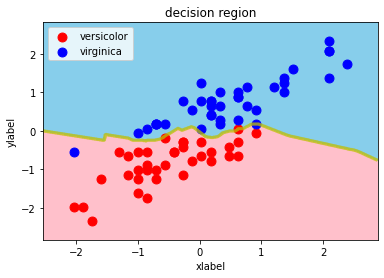

In [116]:
decision_region(X_train,y_train,neigh_3)

### Test Result

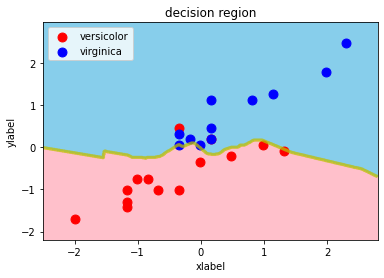

In [119]:
decision_region(X_test,y_test,neigh_3)

### Improvement of the method
In actual problems, we wil improve the method based on index values and visualization, but we will not deal with it in this assignment.

## Comparison of each method

The basic flow for other methods is the same. In other methods, we will go from learning to visualization

## Problem 8: Learning by other methods
Learn, estimate, evaluate, and visualize all of the following methods. Then, summarize the index values ​​in one table. Take a brief look at the results using that table and decision area. Please state which method was good for which index value and what kind of decision area it was.

<li>Nearest neighbor method
<li>Logistic regression
<li>SVM
<li>Decision tree
<li>Random forest </li>

### Nearest neighbor method

Accuracy: 0.84
Precision: 0.842948717948718
Recall: 0.8474025974025974
F1: 0.8397435897435896


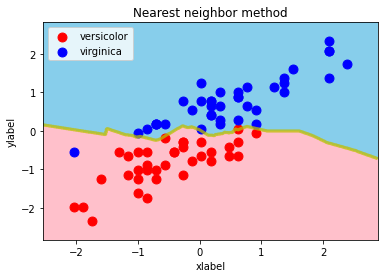

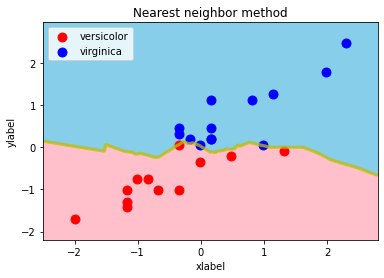

In [120]:
from sklearn.neighbors import KNeighborsClassifier
neigh  = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
knns = [accuracy_score(y_test,y_predict),precision_score(y_test,y_predict,average="macro"),recall_score(y_test,y_predict,average="macro"),f1_score(y_test,y_predict,average="macro")]
# Confusion matrix
confusion_matrix(y_test, y_predict)
decision_region(X_train,y_train,neigh,title="Nearest neighbor method")
decision_region(X_test,y_predict,neigh,title="Nearest neighbor method")

### Logistic regression

Accuracy: 0.92
Precision: 0.9230769230769231
Recall: 0.9285714285714286
F1: 0.9198717948717948


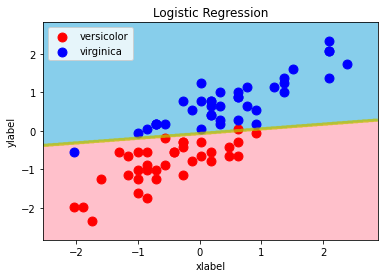

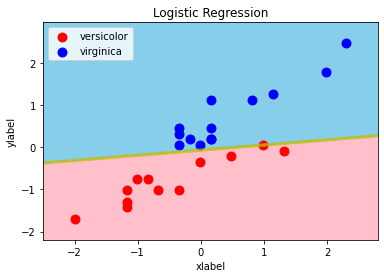

In [121]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
lgs = [accuracy_score(y_test,y_predict),precision_score(y_test,y_predict,average="macro"),recall_score(y_test,y_predict,average="macro"),f1_score(y_test,y_predict,average="macro")]
# Confusion matrix
confusion_matrix(y_test, y_predict)
decision_region(X_train,y_train,clf,title="Logistic Regression")
decision_region(X_test,y_predict,clf,title="Logistic Regression")

### SVM

Accuracy: 0.88
Precision: 0.8928571428571428
Recall: 0.8928571428571428
F1: 0.88


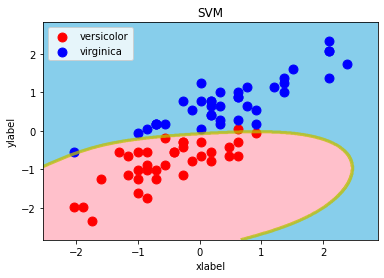

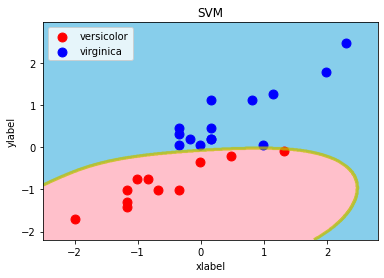

In [122]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
svms = [accuracy_score(y_test,y_predict),precision_score(y_test,y_predict,average="macro"),recall_score(y_test,y_predict,average="macro"),f1_score(y_test,y_predict,average="macro")]
# Confusion matrix
confusion_matrix(y_test, y_predict)
decision_region(X_train,y_train,clf,title="SVM")
decision_region(X_test,y_predict,clf,title="SVM")

### Decision tree

Accuracy: 0.92
Precision: 0.9230769230769231
Recall: 0.9285714285714286
F1: 0.9198717948717948


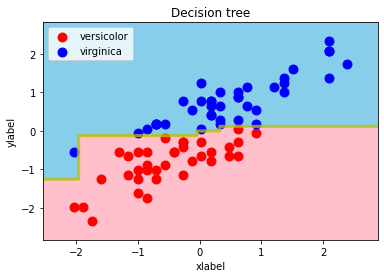

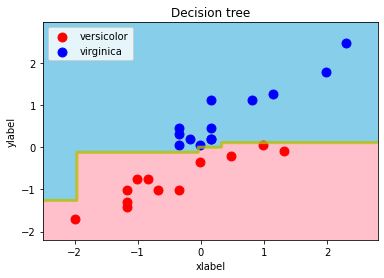

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
# cross_val_score(clf, X_train, y_train, cv=10)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
dts = [accuracy_score(y_test,y_predict),precision_score(y_test,y_predict,average="macro"),recall_score(y_test,y_predict,average="macro"),f1_score(y_test,y_predict,average="macro")]
# Confusion matrix
confusion_matrix(y_test, y_predict)
decision_region(X_train,y_train,clf,title="Decision tree")
decision_region(X_test,y_predict,clf,title="Decision tree")

### Random forest

Accuracy: 0.88
Precision: 0.8928571428571428
Recall: 0.8928571428571428
F1: 0.88


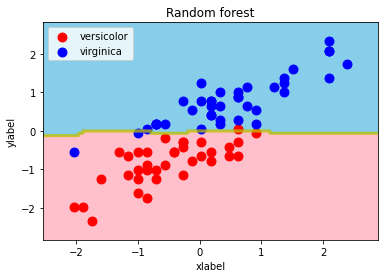

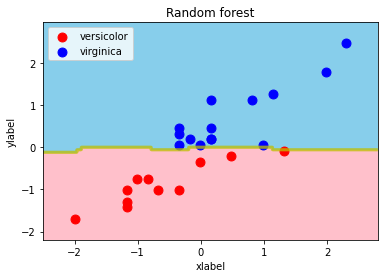

In [124]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
rfs = [accuracy_score(y_test,y_predict),precision_score(y_test,y_predict,average="macro"),recall_score(y_test,y_predict,average="macro"),f1_score(y_test,y_predict,average="macro")]
# Confusion matrix
confusion_matrix(y_test, y_predict)
decision_region(X_train,y_train,clf,title="Random forest")
decision_region(X_test,y_predict,clf,title="Random forest")


## Problem 9: (Advanced task) Comparison with and without standardization
What results would be obtained if you did not use standardization as a preprocessing step? Make a table of the index values and a diagram of the decision domain for each method, and compare and discuss the results. In your discussion, please include what standardization means as a preprocessing step in machine learning.

In [38]:
X_train, X_test, y_train, y_test = train_test_split( np.array(my_X), np.array(my_Y), test_size=0.25, random_state=42)

Accuracy: 0.8
Precision: 0.8198529411764706
Recall: 0.7824675324675325
F1: 0.7877758913412564


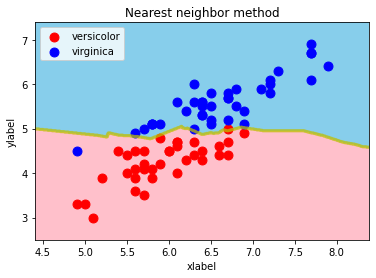

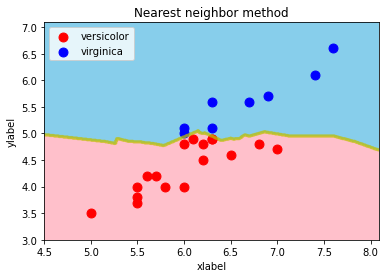

In [44]:
from sklearn.neighbors import KNeighborsClassifier
neigh  = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
knn = [accuracy_score(y_test,y_predict),precision_score(y_test,y_predict,average="macro"),recall_score(y_test,y_predict,average="macro"),f1_score(y_test,y_predict,average="macro")]
# Confusion matrix
confusion_matrix(y_test, y_predict)
decision_region(X_train,y_train,neigh,title="Nearest neighbor method")
decision_region(X_test,y_predict,neigh,title="Nearest neighbor method")

Accuracy: 0.84
Precision: 0.8376623376623377
Recall: 0.8376623376623377
F1: 0.8376623376623377


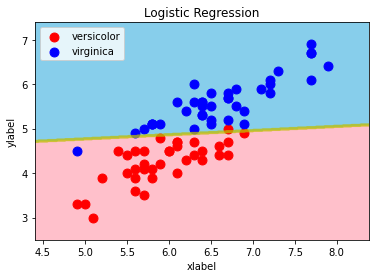

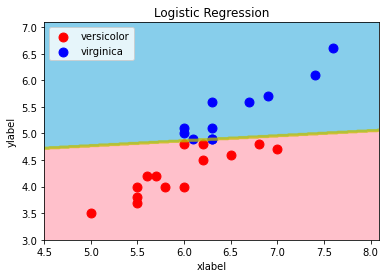

In [46]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
lg = [accuracy_score(y_test,y_predict),precision_score(y_test,y_predict,average="macro"),recall_score(y_test,y_predict,average="macro"),f1_score(y_test,y_predict,average="macro")]
# Confusion matrix
confusion_matrix(y_test, y_predict)
decision_region(X_train,y_train,clf,title="Logistic Regression")
decision_region(X_test,y_predict,clf,title="Logistic Regression")

Accuracy: 0.84
Precision: 0.8376623376623377
Recall: 0.8376623376623377
F1: 0.8376623376623377


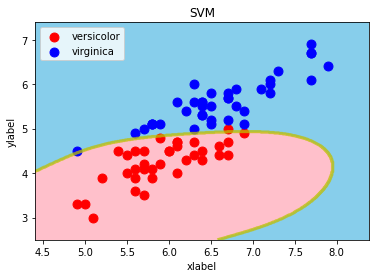

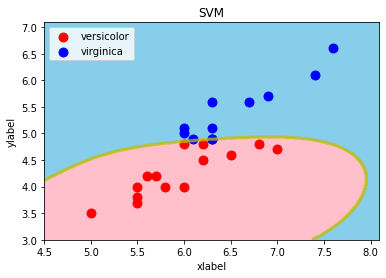

In [47]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
svm = [accuracy_score(y_test,y_predict),precision_score(y_test,y_predict,average="macro"),recall_score(y_test,y_predict,average="macro"),f1_score(y_test,y_predict,average="macro")]
# Confusion matrix
confusion_matrix(y_test, y_predict)
decision_region(X_train,y_train,clf,title="SVM")
decision_region(X_test,y_predict,clf,title="SVM")

Accuracy: 0.84
Precision: 0.8506944444444444
Recall: 0.827922077922078
F1: 0.8333333333333333


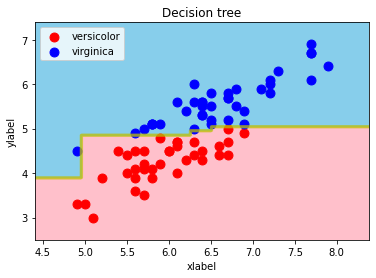

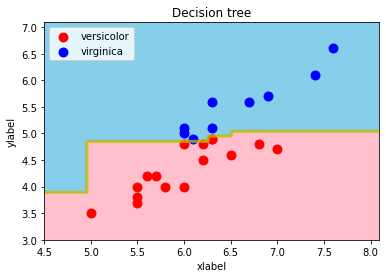

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
# cross_val_score(clf, X_train, y_train, cv=10)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
dt = [accuracy_score(y_test,y_predict),precision_score(y_test,y_predict,average="macro"),recall_score(y_test,y_predict,average="macro"),f1_score(y_test,y_predict,average="macro")]
# Confusion matrix
confusion_matrix(y_test, y_predict)
decision_region(X_train,y_train,clf,title="Decision tree")
decision_region(X_test,y_predict,clf,title="Decision tree")

Accuracy: 0.8
Precision: 0.8198529411764706
Recall: 0.7824675324675325
F1: 0.7877758913412564


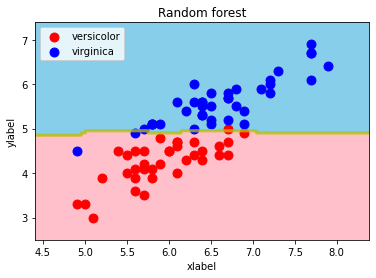

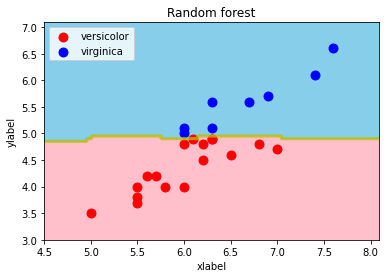

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
rf = [accuracy_score(y_test,y_predict),precision_score(y_test,y_predict,average="macro"),recall_score(y_test,y_predict,average="macro"),f1_score(y_test,y_predict,average="macro")]
# Confusion matrix
confusion_matrix(y_test, y_predict)
decision_region(X_train,y_train,clf,title="Random forest")
decision_region(X_test,y_predict,clf,title="Random forest")


In [125]:
a = pd.concat([pd.DataFrame(knn),pd.DataFrame(lg),pd.DataFrame(svm),pd.DataFrame(dt),pd.DataFrame(rf),pd.DataFrame(knns),pd.DataFrame(lgs),pd.DataFrame(svms),pd.DataFrame(dts),pd.DataFrame(rfs)],axis=1)
a.columns = ["3 KNN","Linear Regression","SVM","Decision Tree","Random Forest","3 KNN (standardization)","Linear Regression(standardization)","SVM(standardization)","Decision Tree (standardization)","Random Forest (standardization)"]
a.index = ["Accuracy","Recall","Precision","F-Measure"]
a

,3 KNN,Linear Regression,SVM,Decision Tree,Random Forest,3 KNN (standardization),Linear Regression(standardization),SVM(standardization),Decision Tree (standardization),Random Forest (standardization)
Accuracy,0.800000,0.840000,0.840000,0.840000,0.800000,0.840000,0.920000,0.880000,0.920000,0.880000
Recall,0.819853,0.837662,0.837662,0.850694,0.819853,0.842949,0.923077,0.892857,0.923077,0.892857
Precision,0.782468,0.837662,0.837662,0.827922,0.782468,0.847403,0.928571,0.892857,0.928571,0.892857
F-Measure,0.787776,0.837662,0.837662,0.833333,0.787776,0.839744,0.919872,0.880000,0.919872,0.880000


The result can be still obtain here and the evaluation is always better for the standardization in almost all case. Standardization is important. For example, say we have a 2-dimensional data set with two features, Height in Meters and Weight in Pounds, that range respectively from [1 to 2] Meters and [10 to 200] Pounds. No matter what distance based model you perform on this data set, the Weight feature will dominate over the Height feature and will have more contribution to the distance computation, just because it has bigger values compared to the Height. So, to prevent this problem, transforming features to comparable scales using standardization is the solution

## Problem 10: (Advance task) Highly accurate method using all objective variables
Up to this point, we have reduced the types of irises and performed binary classification, but we will perform multi-value classification using all three types. Learn, estimate, and evaluate to find the most accurate method.
### Changes due to becoming multi-valued
It is necessary to change the parameters of the library from the defaults for the index values Precision, Recall, and F-measure. We will use the concept of micro-averaging and macro-averaging.


The aforementioned function to visualize the decision region needs to be rewritten appropriately. The following is an example output.

Logistic regression and SVM are based on binary classification, and multi-level classification requires ingenuity, but scikit-learn automatically makes decisions and processes them, so no changes are necessary.

In [126]:
my_X = data.loc[:,["sepal_length","petal_length"]]
my_Y = data.loc[:,"Species"]
# np.array(my_X)
# np.array(my_Y)
X_train, X_test, y_train, y_test = train_test_split( np.array(my_X), np.array(my_Y), test_size=0.25, random_state=42)

In [127]:
def multi_decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue','green']
    contourf_color = ['pink', 'skyblue','gray']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

### KNN

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1: 0.9710144927536232


D:\Program Files (x86)\envs\blending\lib\site-packages\ipykernel_launcher.py:36: UserWarning: No contour levels were found within the data range.


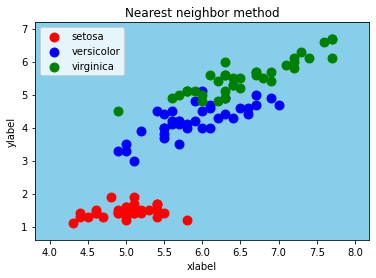

D:\Program Files (x86)\envs\blending\lib\site-packages\ipykernel_launcher.py:36: UserWarning: No contour levels were found within the data range.


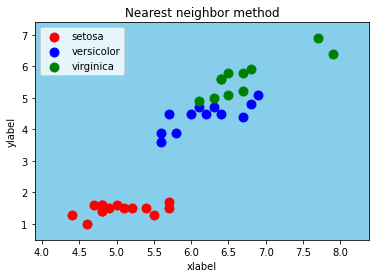

In [128]:
from sklearn.neighbors import KNeighborsClassifier
neigh  = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)
y_predict
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
# Confusion matrix
confusion_matrix(y_test, y_predict)
multi_decision_region(X_train,y_train,clf,title="Nearest neighbor method")
multi_decision_region(X_test,y_predict,clf,title="Nearest neighbor method")

### Logisstic Regression

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


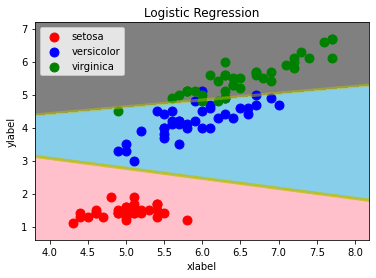

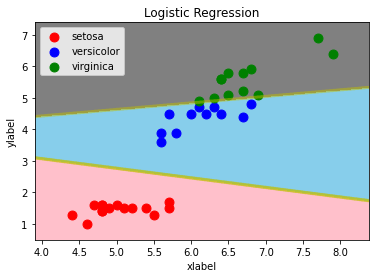

In [129]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
# Confusion matrix
confusion_matrix(y_test, y_predict)
multi_decision_region(X_train,y_train,clf,title="Logistic Regression")
multi_decision_region(X_test,y_predict,clf,title="Logistic Regression")

### SVM 

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


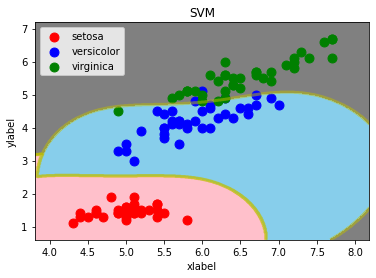

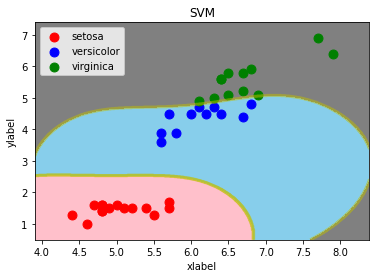

In [130]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
# Confusion matrix
confusion_matrix(y_test, y_predict)
multi_decision_region(X_train,y_train,clf,title="SVM")
multi_decision_region(X_test,y_predict,clf,title="SVM")

### Decision Tree

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1: 0.9710144927536232


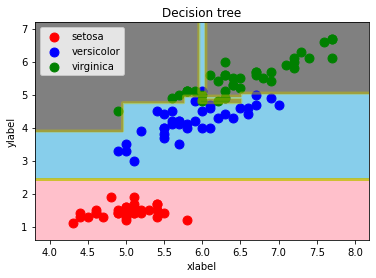

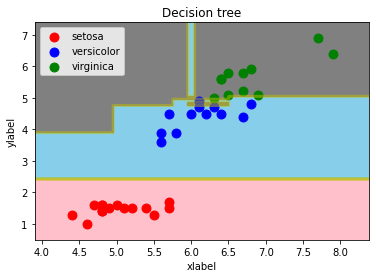

In [131]:
clf = DecisionTreeClassifier()
# cross_val_score(clf, X_train, y_train, cv=10)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
# Confusion matrix
confusion_matrix(y_test, y_predict)
multi_decision_region(X_train,y_train,clf,title="Decision tree")
multi_decision_region(X_test,y_predict,clf,title="Decision tree")

### Random Forest

Accuracy: 0.9736842105263158
Precision: 0.9743589743589745
Recall: 0.9696969696969697
F1: 0.9707936507936509


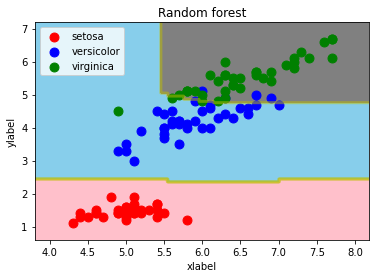

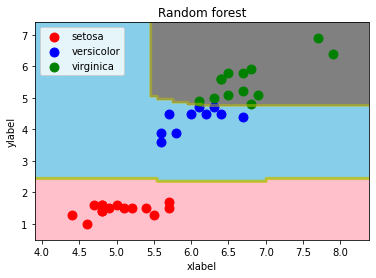

In [132]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_predict)))
print("Precision: {}".format(precision_score(y_test,y_predict,average="macro")))
print("Recall: {}".format(recall_score(y_test,y_predict,average="macro")))
print("F1: {}".format(f1_score(y_test,y_predict,average="macro")))
# Confusion matrix
confusion_matrix(y_test, y_predict)
multi_decision_region(X_train,y_train,clf,title="Random forest")
multi_decision_region(X_test,y_predict,clf,title="Random forest")